In [3]:
import pandas as pd
df = pd.read_excel("C:/Users/rajes/OneDrive/Documents/E-commerce Customer Behavior - Sheet1.xlsx")  # Replace with your filename
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [7]:
columns = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

# Calculate mean, median, std
mean_values = df[columns].mean()
median_values = df[columns].median()
std_values = df[columns].std()
columns = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nStandard Deviation:\n", std_values)

Mean:
 Age                          33.597143
Total Spend                 845.381714
Items Purchased              12.600000
Average Rating                4.019143
Days Since Last Purchase     26.588571
dtype: float64

Median:
 Age                          32.5
Total Spend                 775.2
Items Purchased              12.0
Average Rating                4.1
Days Since Last Purchase     23.0
dtype: float64

Standard Deviation:
 Age                           4.870882
Total Spend                 362.058695
Items Purchased               4.155984
Average Rating                0.580539
Days Since Last Purchase     13.440813
dtype: float64


In [9]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [11]:
from sklearn.preprocessing import LabelEncoder

# label encoding to Gender, Membership Type, and Satisfaction Level.
columns_to_encode = [ 'Gender', 'Membership Type' ,'Satisfaction Level']
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("\nDataFrame after Label Encoding:")
print(df)


DataFrame after Label Encoding:
     Customer ID  Gender  Age           City  Membership Type  Total Spend  \
0            101       0   29       New York                1      1120.20   
1            102       1   34    Los Angeles                2       780.50   
2            103       0   43        Chicago                0       510.75   
3            104       1   30  San Francisco                1      1480.30   
4            105       1   27          Miami                2       720.40   
..           ...     ...  ...            ...              ...          ...   
345          446       1   32          Miami                2       660.30   
346          447       0   36        Houston                0       470.50   
347          448       0   30       New York                1      1190.80   
348          449       1   34    Los Angeles                2       780.20   
349          450       0   43        Chicago                0       515.75   

     Items Purchased  Average 

In [13]:
print(df.columns.tolist())

['Customer ID', 'Gender', 'Age', 'City', 'Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase', 'Satisfaction Level']


In [15]:
# One-Hot Encoding on 'city'
df = pd.get_dummies(df, columns=['City'], drop_first=True)
print(df)

     Customer ID  Gender  Age  Membership Type  Total Spend  Items Purchased  \
0            101       0   29                1      1120.20               14   
1            102       1   34                2       780.50               11   
2            103       0   43                0       510.75                9   
3            104       1   30                1      1480.30               19   
4            105       1   27                2       720.40               13   
..           ...     ...  ...              ...          ...              ...   
345          446       1   32                2       660.30               10   
346          447       0   36                0       470.50                8   
347          448       0   30                1      1190.80               16   
348          449       1   34                2       780.20               11   
349          450       0   43                0       515.75               10   

     Average Rating  Discount Applied  

In [17]:
# for converting city boolen to numerical 
city_cols = [col for col in df.columns if col.startswith('City')]
df[city_cols] = df[city_cols].astype(int)
print(df[city_cols])

     City_Houston  City_Los Angeles  City_Miami  City_New York  \
0               0                 0           0              1   
1               0                 1           0              0   
2               0                 0           0              0   
3               0                 0           0              0   
4               0                 0           1              0   
..            ...               ...         ...            ...   
345             0                 0           1              0   
346             1                 0           0              0   
347             0                 0           0              1   
348             0                 1           0              0   
349             0                 0           0              0   

     City_San Francisco  
0                     0  
1                     0  
2                     0  
3                     1  
4                     0  
..                  ...  
345                   0  

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Standardization (Z-score Scaling) using StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[['Total Spend', 'Items Purchased']])  # Fit and transform the desired columns
df_standardized = pd.DataFrame(standardized_data, columns=['Total Spend', 'Items Purchased'])

print("\nStandardized DataFrame (first 5 rows):")
print(df_standardized.head())

# 2. Normalization (Min-Max Scaling) using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[['Total Spend', 'Items Purchased']])  # Fit and transform the desired columns
df_normalized = pd.DataFrame(normalized_data, columns=['Total Spend', 'Items Purchased'])

print("\nNormalized DataFrame (first 5 rows):")
print(df_normalized.head())



Standardized DataFrame (first 5 rows):
   Total Spend  Items Purchased
0     0.760130         0.337346
1    -0.179459        -0.385538
2    -0.925570        -0.867461
3     1.756144         1.542153
4    -0.345692         0.096385

Normalized DataFrame (first 5 rows):
   Total Spend  Items Purchased
0     0.639502         0.500000
1     0.333273         0.285714
2     0.090102         0.142857
3     0.964122         0.857143
4     0.279095         0.428571


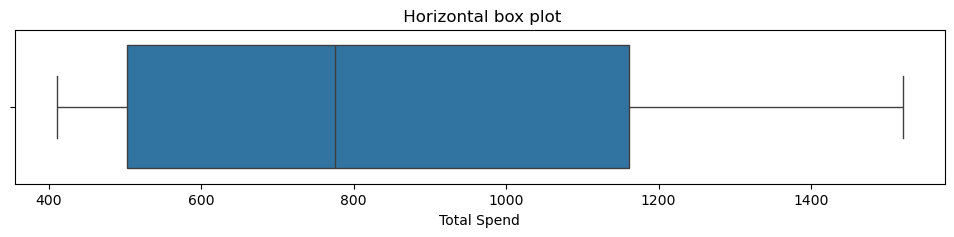

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# box plot

plt.figure(figsize=(12,2))
sns.boxplot(x=df['Total Spend'], orient = 'h')
plt.title(" Horizontal box plot")
plt.xlabel("Total Spend")
plt.show()

In [23]:
# Detect outlier using IQR

Q1 = df['Total Spend'].quantile(0.25)
Q3 = df['Total Spend'].quantile(0.75)
print('Q1:', Q1)
print('Q3:', Q3)

IQR = Q3 - Q1
print(f'IQR_value: {IQR:.2f}')

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower_bound: {lower_bound:.2f}')
print(f'upper_bound: {upper_bound:.2f}')

outliers = df[(df['Total Spend'] < lower_bound) | (df['Total Spend'] > upper_bound)]
print("Outliers:\n", outliers)

Q1: 502.0
Q3: 1160.6
IQR_value: 658.60
lower_bound: -485.90
upper_bound: 2148.50
Outliers:
 Empty DataFrame
Columns: [Customer ID, Gender, Age, Membership Type, Total Spend, Items Purchased, Average Rating, Discount Applied, Days Since Last Purchase, Satisfaction Level, City_Houston, City_Los Angeles, City_Miami, City_New York, City_San Francisco]
Index: []


In [25]:
# Detect outlier using IQR

Q1 = df['Total Spend'].quantile(0.25)
Q3 = df['Total Spend'].quantile(0.75)
print('Q1:', Q1)
print('Q3:', Q3)

IQR = Q3 - Q1

print('IQR_value:', IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('lower_bound:' ,lower_bound)
print('upper_bound:',upper_bound)

outliers = df[(df['Total Spend'] < lower_bound) | (df['Total Spend'] > upper_bound)]
print("Number of Outliers Detected:", len(outliers))

Q1: 502.0
Q3: 1160.6
IQR_value: 658.5999999999999
lower_bound: -485.89999999999986
upper_bound: 2148.5
Number of Outliers Detected: 0


## 2. Classification and Clustering Insights 
(a) Use the processed data to predict customer satisfaction (Satisfaction Level) as a
classification problem
• Encode labels (e.g., Satisfied = 2, Neutral = 1, Unsatisfied = 0)
• Use Logistic Regression to build a model. Show accuracy and confusion matrix.
(b) Use K-Means Clustering to segment the customers: 
• Apply clustering on numeric features (after scaling).
• Use Elbow Method to determine optimal number of clusters.
• Visualize clusters with a scatter plot of any 2 key features.

(c) Identify key features influencing satisfaction:
• Use SelectKBest and correlation matrix to find the most relevant features.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2

X = df.drop('Satisfaction Level', axis=1)
y = df['Satisfaction Level']  # Encoded (0=Unsatisfied, 1=Neutral, 2=Satisfied)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.9857142857142858
Confusion Matrix:
 [[23  0  0]
 [ 1 28  0]
 [ 0  0 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        18

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70



C:\Users\rajes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


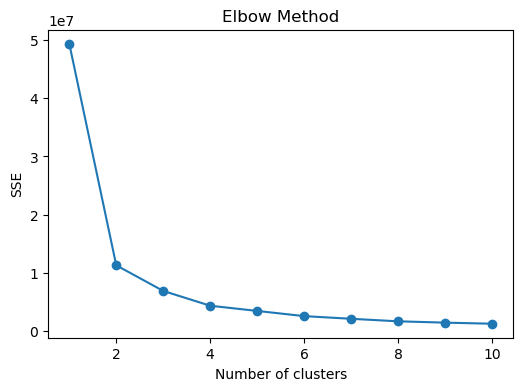

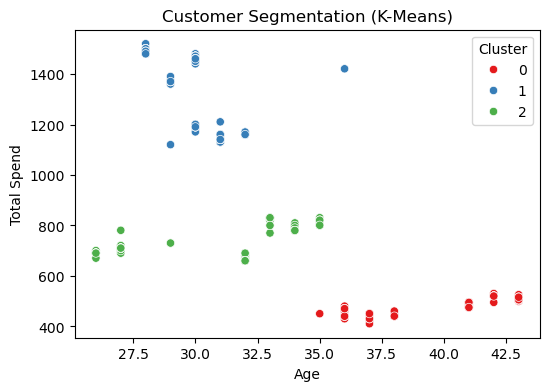

In [37]:
# 2(b) K-Means Clustering
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

numeric_features = df.select_dtypes(include=[np.number])

# Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(numeric_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

# Assuming optimal k=3 (from elbow)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(numeric_features)

# Scatter plot (example: Age vs Total Spend)
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Age'], y=df['Total Spend'], hue=df['Cluster'], palette='Set1')
plt.title("Customer Segmentation (K-Means)")
plt.show()


Top Features Influencing Satisfaction (SelectKBest):

                     Feature         Score
4                Total Spend  43616.125697
8   Days Since Last Purchase   1760.317293
5            Items Purchased    350.438289
9               City_Houston    130.930068
11                City_Miami    117.000000


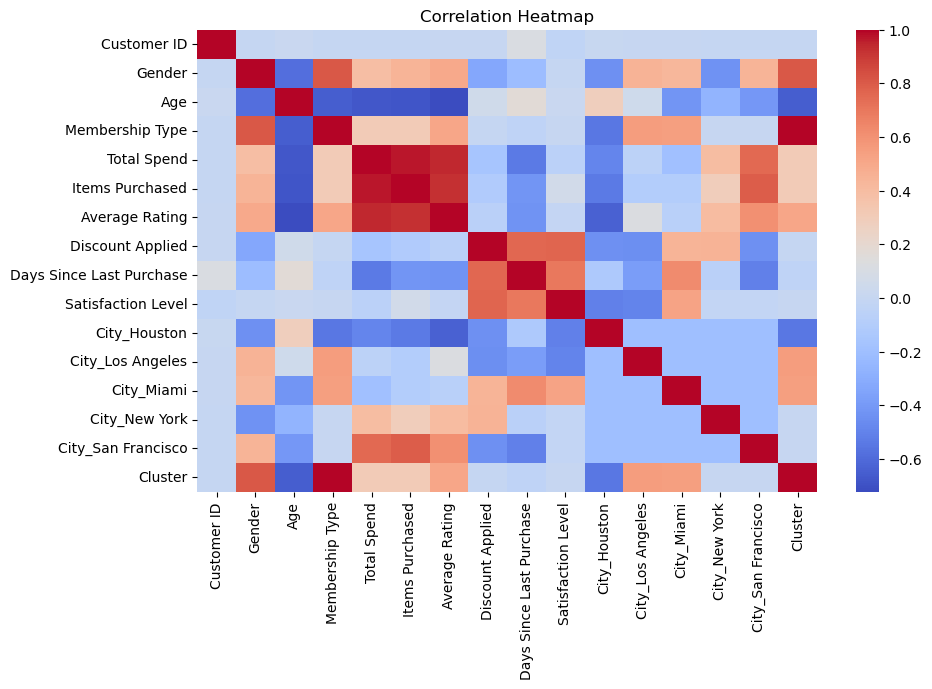

In [35]:
# 2(c) Feature Importance (SelectKBest & Correlation)
X = df.drop(['Satisfaction Level', 'Cluster'], axis=1)
y = df['Satisfaction Level']

# SelectKBest
best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature','Score']
print("\nTop Features Influencing Satisfaction (SelectKBest):\n")
print(featureScores.nlargest(5,'Score'))

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

